<a href="https://colab.research.google.com/github/sunjorkey/EIT2/blob/main/Housing_Data_Predictions_Linear_Regression_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

In [1242]:
house_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week3/ass/raw_house_data.csv')

##Data clean

In [1243]:
house_df.count()


MLS                 5000
sold_price          5000
zipcode             5000
longitude           5000
latitude            5000
lot_acres           4990
taxes               5000
year_built          5000
bedrooms            5000
bathrooms           5000
sqrt_ft             5000
garage              5000
kitchen_features    5000
fireplaces          4975
floor_covering      5000
HOA                 5000
dtype: int64

In [1244]:
# count the number of missing values in each column 
house_df.isnull().sum() 

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

In [1245]:
house_df=house_df.drop_duplicates()
# remove any duplicate rows 

In [1246]:
for col in house_df.columns:
    print(f"Column {col} has {(house_df[col] == 'None').sum()} None values")

#iterates through each column and prints the number of "None" values in that column.

Column MLS has 0 None values
Column sold_price has 0 None values
Column zipcode has 0 None values
Column longitude has 0 None values
Column latitude has 0 None values
Column lot_acres has 0 None values
Column taxes has 0 None values
Column year_built has 0 None values
Column bedrooms has 0 None values
Column bathrooms has 6 None values
Column sqrt_ft has 56 None values
Column garage has 7 None values
Column kitchen_features has 33 None values
Column fireplaces has 0 None values
Column floor_covering has 1 None values
Column HOA has 562 None values


<Axes: >

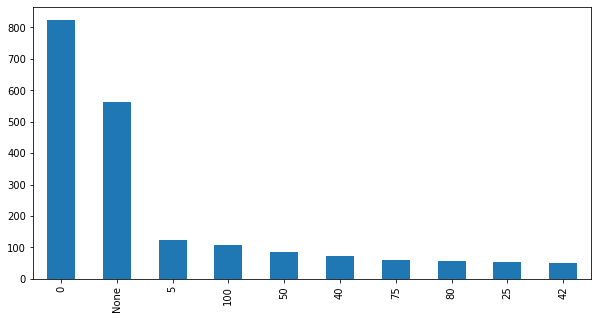

In [1247]:
house_df.HOA.value_counts().nlargest(10).plot(kind='bar',figsize=(10,5))

In [1248]:
house_df = house_df.replace('None', np.nan)  
#replaces the value "None" with the value "NaN"

In [1249]:
house_df['HOA'] = house_df['HOA'].str.replace(r'\D+', '', regex=True)

# remove all non-numeric characters from the values in the HOA column

In [1250]:
house_df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [1251]:
house_df['bathrooms'] = house_df['bathrooms'].astype(float)
house_df['bedrooms'] = house_df['bedrooms'].astype(float)
house_df['year_built'] = house_df['year_built'].astype(int)
house_df['sqrt_ft'] = house_df['sqrt_ft'].astype(float)
house_df['garage'] = house_df['garage'].astype(float)
house_df['bathrooms'] = house_df['bathrooms'].astype(float)
house_df['fireplaces'] = house_df['fireplaces'].astype(float)
house_df['HOA'] = house_df['HOA'].astype(float)

#converts  data type

In [1252]:
house_df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms            float64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
dtype: object

In [1253]:
house_df['HOA'].mean()

445.08765209553854

In [1254]:
house_df.groupby(['zipcode']).mean(10)

# group the dataframe by the column "zipcode" and then take the mean of each group. 

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
zipcode,,,,,,,,,,,,,
85118,2.170180e+07,6.900000e+05,-111.430863,33.366202,1.250000,7716.660000,2007.000000,4.000000,4.000000,4361.000000,4.000000,1.000000,0.000000
85192,2.183245e+07,4.750000e+05,-110.755428,32.964708,12.060000,1000.000000,1969.000000,3.000000,2.000000,1772.000000,0.000000,0.000000,NaN
85541,2.182357e+07,6.000000e+05,-111.335860,34.314889,2.490000,1993.000000,1975.000000,4.000000,2.000000,2367.000000,2.000000,2.000000,0.000000
85601,3.586477e+06,4.900000e+05,-111.299662,31.584172,38.980000,5739.000000,1977.000000,4.000000,3.000000,2811.000000,NaN,1.000000,NaN
85602,2.128234e+07,6.205000e+05,-110.343385,32.069192,238.465000,7729.940000,1999.500000,3.500000,4.000000,3143.500000,3.000000,1.500000,0.000000
85603,2.181917e+07,9.870000e+05,-109.980961,31.486463,36.000000,1630.400000,1985.000000,3.000000,4.000000,5802.000000,0.000000,1.000000,NaN
85605,2.142016e+07,4.250000e+05,-109.454637,32.283327,68.700000,4507.920000,2007.000000,3.000000,4.000000,3640.000000,3.000000,1.000000,0.000000
85609,2.142447e+07,2.500000e+06,-110.095713,32.057222,1048.180000,2441.600000,1985.000000,2.000000,2.000000,2895.000000,0.000000,1.000000,0.000000
85610,2.168115e+07,7.470000e+05,-109.826223,31.712335,117.020000,4033.240000,2007.500000,3.000000,4.000000,4268.000000,3.000000,3.500000,42.000000


In [1255]:
house_df['HOA'] = house_df.groupby('zipcode')['HOA'].transform(lambda x: x.fillna(x.mean()))

#filling in missing values in the 'HOA' column of the dataframe with the mean value of 'HOA' for each zipcode.

Text(0, 0.5, 'zipcode')

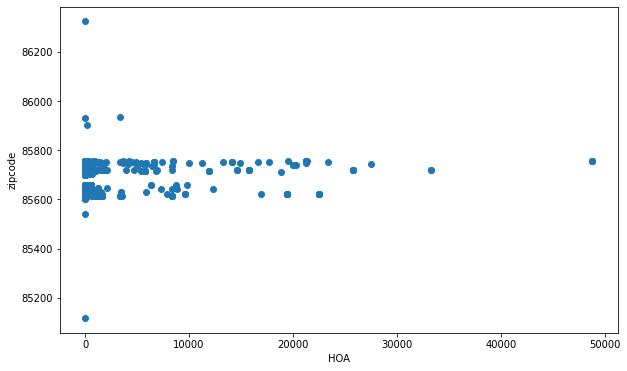

In [1256]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(house_df['HOA'],house_df['zipcode'])
ax.set_xlabel('HOA')
ax.set_ylabel('zipcode')

In [1257]:
house_df = house_df.replace( np.nan,'None')  

#replacing all NaN values with the string 'None'. 

In [1258]:
for col in house_df.columns:
    print(f"Column {col} has {(house_df[col] == 'None').sum()} None values")

#iterates through each column in a dataframe and prints out the number of values in each column that are equal to 'None'.

Column MLS has 0 None values
Column sold_price has 0 None values
Column zipcode has 0 None values
Column longitude has 0 None values
Column latitude has 0 None values
Column lot_acres has 10 None values
Column taxes has 0 None values
Column year_built has 0 None values
Column bedrooms has 0 None values
Column bathrooms has 6 None values
Column sqrt_ft has 56 None values
Column garage has 7 None values
Column kitchen_features has 33 None values
Column fireplaces has 25 None values
Column floor_covering has 1 None values
Column HOA has 6 None values


In [1259]:
house_df = house_df[~(house_df == 'None').any(axis=1)]

#remove any rows that contain a value of "None" in any column 

In [1260]:
for col in house_df.columns:
    print(f"Column {col} has {(house_df[col] == 'None').sum()} None values")

Column MLS has 0 None values
Column sold_price has 0 None values
Column zipcode has 0 None values
Column longitude has 0 None values
Column latitude has 0 None values
Column lot_acres has 0 None values
Column taxes has 0 None values
Column year_built has 0 None values
Column bedrooms has 0 None values
Column bathrooms has 0 None values
Column sqrt_ft has 0 None values
Column garage has 0 None values
Column kitchen_features has 0 None values
Column fireplaces has 0 None values
Column floor_covering has 0 None values
Column HOA has 0 None values


In [1261]:
for col in house_df.columns:
    print(f"Column {col} has {(house_df[col] == 0).sum()} Zero values")
# iterates through each column in the dataframe and prints the number of zero values in that column. 

Column MLS has 0 Zero values
Column sold_price has 0 Zero values
Column zipcode has 0 Zero values
Column longitude has 0 Zero values
Column latitude has 0 Zero values
Column lot_acres has 35 Zero values
Column taxes has 22 Zero values
Column year_built has 5 Zero values
Column bedrooms has 0 Zero values
Column bathrooms has 0 Zero values
Column sqrt_ft has 0 Zero values
Column garage has 178 Zero values
Column kitchen_features has 0 Zero values
Column fireplaces has 299 Zero values
Column floor_covering has 0 Zero values
Column HOA has 831 Zero values


In [1262]:
house_df['year_built'] = house_df['year_built'][house_df['year_built'] != 0]

# dropping all rows from the dataframe where the year_built column contains a 0 

<ipython-input-1262-2ee28de864e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['year_built'] = house_df['year_built'][house_df['year_built'] != 0]


In [1263]:
for col in house_df.columns:
    print(f"Column {col} has {(house_df[col] == 0).sum()} Zero values")

Column MLS has 0 Zero values
Column sold_price has 0 Zero values
Column zipcode has 0 Zero values
Column longitude has 0 Zero values
Column latitude has 0 Zero values
Column lot_acres has 35 Zero values
Column taxes has 22 Zero values
Column year_built has 0 Zero values
Column bedrooms has 0 Zero values
Column bathrooms has 0 Zero values
Column sqrt_ft has 0 Zero values
Column garage has 178 Zero values
Column kitchen_features has 0 Zero values
Column fireplaces has 299 Zero values
Column floor_covering has 0 Zero values
Column HOA has 831 Zero values


<Axes: >

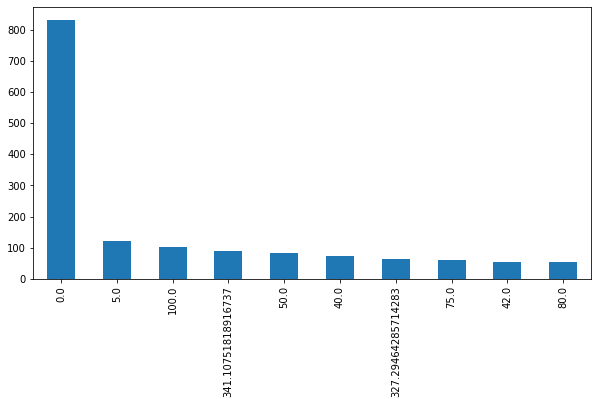

In [1264]:
house_df.HOA.value_counts().nlargest(10).plot(kind='bar',figsize=(10,5))

In [1265]:
house_df=house_df.dropna()
#dropping any rows with a missing value

In [1266]:
house_df.count()

MLS                 4899
sold_price          4899
zipcode             4899
longitude           4899
latitude            4899
lot_acres           4899
taxes               4899
year_built          4899
bedrooms            4899
bathrooms           4899
sqrt_ft             4899
garage              4899
kitchen_features    4899
fireplaces          4899
floor_covering      4899
HOA                 4899
dtype: int64

In [1267]:
house_df.isnull().sum() 

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

In [1268]:
house_df['price_Per_Sqrt_ft'] = house_df['sold_price']/house_df['sqrt_ft']

<ipython-input-1268-6346c30ac6c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['price_Per_Sqrt_ft'] = house_df['sold_price']/house_df['sqrt_ft']


In [1269]:
house_df['lot_rate'] = house_df['lot_acres']*43560 /house_df['sqrt_ft']

<ipython-input-1269-6a2f04f2523d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['lot_rate'] = house_df['lot_acres']*43560 /house_df['sqrt_ft']


In [1270]:
house_df = house_df.replace(np.inf, np.nan)
house_df.dropna()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,price_Per_Sqrt_ft,lot_rate
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.0,5272.00,1941.0,13.0,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0,504.761905,8936.022857
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.0,10422.36,1997.0,2.0,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0,575.342466,10185.879452
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930.0,7.0,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",203.974359,498.946668,3074.991152
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995.0,4.0,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,533.37242,21.861726
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999.0,3.0,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.0,475.007308,10.632154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,21908358,565000.0,85750,-110.820216,32.307646,0.83,4568.71,1986.0,4.0,3.0,2813.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",2.0,"Carpet, Mexican Tile",6.0,200.853182,12.852755
4994,21909379,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002.0,3.0,2.0,2106.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,Ceramic Tile,198.0,254.036087,3.723077
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005.0,5.0,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",685.583333,137.461816,60.241266
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990.0,4.0,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.0,237.273512,26.684728


## create a new column for price range


In [1271]:
house_df['price_range'] = 0

In [1272]:
# assign values to price range column
house_df.loc[house_df['price_Per_Sqrt_ft'] <= 100, 'price_range'] = 1
house_df.loc[(house_df['price_Per_Sqrt_ft'] > 100) & (house_df['price_Per_Sqrt_ft'] <= 200), 'price_range'] = 2
house_df.loc[(house_df['price_Per_Sqrt_ft'] > 200) & (house_df['price_Per_Sqrt_ft'] <= 300), 'price_range'] = 3
house_df.loc[(house_df['price_Per_Sqrt_ft'] > 300) & (house_df['price_Per_Sqrt_ft'] <= 400), 'price_range'] = 4
house_df.loc[(house_df['price_Per_Sqrt_ft'] > 400) & (house_df['price_Per_Sqrt_ft'] <= 500), 'price_range'] = 5
house_df.loc[(house_df['price_Per_Sqrt_ft'] > 500) & (house_df['price_Per_Sqrt_ft'] <= 600), 'price_range'] = 6
house_df.loc[(house_df['price_Per_Sqrt_ft'] > 600) & (house_df['price_Per_Sqrt_ft'] <= 700), 'price_range'] = 7
house_df.loc[(house_df['price_Per_Sqrt_ft'] > 700) & (house_df['price_Per_Sqrt_ft'] <= 800), 'price_range'] = 8
house_df.loc[(house_df['price_Per_Sqrt_ft'] > 800) & (house_df['price_Per_Sqrt_ft'] <= 900), 'price_range'] = 9
house_df.loc[house_df['price_Per_Sqrt_ft'] > 900, 'price_range'] = 10

In [1273]:
house_df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,price_Per_Sqrt_ft,lot_rate,price_range
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.0,5272.00,1941.0,13.0,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0,504.761905,8936.022857,6
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.0,10422.36,1997.0,2.0,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0,575.342466,10185.879452,6
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930.0,7.0,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",203.974359,498.946668,3074.991152,5
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995.0,4.0,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,533.37242,21.861726,6
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999.0,3.0,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.0,475.007308,10.632154,5


In [1274]:
house_df['latitude']

0       31.356362
1       31.594213
3       31.645878
4       32.285162
5       32.339090
          ...    
4993    32.307646
4994    32.317496
4995    31.907917
4996    32.316373
4998    32.296871
Name: latitude, Length: 4899, dtype: float64

In [1275]:
house_df['latitude']=house_df['latitude']*1000000
house_df['longitude']=house_df['longitude']*1000000
house_df['latitude']

0       31356362.0
1       31594213.0
3       31645878.0
4       32285162.0
5       32339090.0
           ...    
4993    32307646.0
4994    32317496.0
4995    31907917.0
4996    32316373.0
4998    32296871.0
Name: latitude, Length: 4899, dtype: float64

In [1276]:
house_df['latitude'] = house_df['latitude'].astype(int)
house_df['longitude'] = house_df['longitude'].astype(int)
house_df['lot_rate'] = house_df['lot_rate'].astype(int)
house_df['sold_price'] = house_df['sold_price'].astype(int)
house_df['sqrt_ft'] = house_df['sqrt_ft'].astype(int)
house_df['price_Per_Sqrt_ft'] = house_df['price_Per_Sqrt_ft'].astype(int)
  


In [1277]:
house_df.dtypes

MLS                    int64
sold_price             int64
zipcode                int64
longitude              int64
latitude               int64
lot_acres             object
taxes                float64
year_built           float64
bedrooms             float64
bathrooms             object
sqrt_ft                int64
garage                object
kitchen_features      object
fireplaces            object
floor_covering        object
HOA                   object
price_Per_Sqrt_ft      int64
lot_rate               int64
price_range            int64
dtype: object

In [1278]:
X=house_df[['price_range','latitude','longitude','zipcode']].copy()

In [1279]:
usecase=house_df[['price_range','lot_acres','lot_rate','sqrt_ft','latitude','longitude','sold_price','price_Per_Sqrt_ft']].copy()
usecase

,price_range,lot_acres,lot_rate,sqrt_ft,latitude,longitude,sold_price,price_Per_Sqrt_ft
0,6,2154.0,8936,10500,31356362,-110378200,5300000,504
1,6,1707.0,10185,7300,31594213,-111045371,4200000,575
3,5,636.67,3074,9019,31645878,-111035925,4500000,498
4,6,3.21,21,6396,32285162,-110813768,3411450,533
5,5,1.67,10,6842,32339090,-110910593,3250000,475
...,...,...,...,...,...,...,...,...
4993,3,0.83,12,2813,32307646,-110820216,565000,200
4994,3,0.18,3,2106,32317496,-110922291,535000,254
4995,2,4.98,60,3601,31907917,-110661829,495000,137
4996,3,1.42,26,2318,32316373,-110858556,550000,237


In [1280]:
#X = np.array(X, dtype=np.int64) 

In [1281]:
#X = X.astype(int)

In [1282]:
#X  = X.astype(float)

In [1283]:
X=X.to_numpy()


In [1284]:
y=X[:,0]
y

array([6, 6, 5, ..., 2, 3, 2])

In [1285]:
X=X[:,1:]
X

array([[  31356362, -110378200,      85637],
       [  31594213, -111045371,      85646],
       [  31645878, -111035925,      85646],
       ...,
       [  31907917, -110661829,      85641],
       [  32316373, -110858556,      85750],
       [  32296871, -111055528,      85745]])

##split data

In [1286]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.9,test_size=0.1, random_state=101)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print ("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:  [[  32314079 -110839437      85750]
 [  32292655 -110799494      85749]
 [  32434775 -110976939      85755]
 ...
 [  32406416 -110988991      85737]
 [  32257520 -111065113      85745]
 [  32459894 -110980627      85755]]
y_train:  [2 2 2 ... 3 3 3]
X_test:  [[  32316401 -110838149      85750]
 [  32407289 -110964806      85737]
 [  32316373 -110858556      85750]
 ...
 [  32296115 -110827564      85750]
 [  32332155 -110902762      85718]
 [  32303547 -110756841      85749]]
y_test:  [4 2 3 2 2 3 3 3 2 2 3 1 3 2 3 3 5 2 2 2 5 2 3 3 3 2 3 3 3 3 2 4 3 3 3 3 3
 2 4 3 5 3 3 3 3 3 2 3 2 2 2 2 2 2 3 2 3 3 3 3 2 4 3 3 4 2 2 3 3 2 2 3 2 2
 3 2 2 2 2 2 3 2 2 2 3 5 2 3 6 3 2 3 3 2 4 3 2 3 3 2 4 3 2 3 2 2 3 3 4 2 2
 2 2 2 3 2 2 3 3 3 2 2 2 3 2 2 3 2 2 2 3 3 2 4 3 3 2 3 3 2 3 3 3 2 2 3 3 3
 4 2 6 3 3 2 2 2 4 3 3 4 2 3 2 3 2 3 2 4 2 2 2 2 3 3 3 4 2 3 3 2 3 2 2 3 2
 2 2 3 3 4 2 3 3 2 3 3 3 3 3 2 2 2 3 3 2 3 2 3 3 2 3 3 3 2 4 3 3 3 2 3 3 3
 3 3 4 3 2 3 3 2 3 2 2 4 2 2 3 2 3 4 3 2 3 2 2 2 3

In [1287]:
def accuracy(y_train, y_train_hat):
  return np.mean(y_train==y_train_hat)

##KNN

In [1288]:
#Apply class for KNN classification
class KNNClassifier():

  def fit(self,X,y):
    self.X=X
    self.y=y

  def predict(self,X,K, epsilon =1e-3):
    N= len(X)
    y_hat=np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)    
      idxt = np.argsort(dist2)[:K]    #sorted indices 
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i]= np.bincount(self.y[idxt],weights=gamma_k).argmax()

    return y_hat
  

In [1289]:
#train and predict using KNN
knn=KNNClassifier()
knn.fit(X_train,y_train)
y_train_hat=knn.predict(X_train,5)
y_test_hat=knn.predict(X_test,5)

In [1290]:
accuracy(y_train,y_train_hat)

0.9977319119981856

In [1291]:
accuracy(y_test,y_test_hat)

0.6

In [1292]:
from geopy import Nominatim
def get_location(address):
    geolocator = Nominatim(user_agent="myGeocoder")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

In [1293]:
# get coordinates of user input address
address = input("Please enter your address: ")
latitude, longitude = get_location(address)
print("Latitude: {}, Longitude: {}".format(latitude, longitude))
#    41 E Oregon St, Tucson, AZ 85706

Please enter your address: 41 E Oregon St, Tucson, AZ 85706
Latitude: 32.15355822959653, Longitude: -110.96749222561645


In [1294]:
sold_price = int(input("Please enter the sold_price: "))
#85646

Please enter the sold_price: 85646


In [1295]:
XTest=np.array([[longitude,latitude,sold_price]])
longitude,latitude,sold_price

(-110.96749222561645, 32.15355822959653, 85646)

In [1296]:
YTest=knn.predict(XTest,10)

In [1297]:
YTest

array([2.])

##KNN R

In [1298]:
class KNNRegressor():

  def fit(self,X,y):
    self.X=X
    self.y=y

  def predict(self,X,K,epsilon=1e-3):
    N = len(X)  #num of observsions
    y_hat = np.zeros(N)

    for i in range(N):
      dist2= np.sum((self.X-X[i])**2,axis=1)
      idxt = np.argsort(dist2)[:K]    #nearest N
      gamma_k =  np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
      y_hat[i]=gamma_k.dot(self.y[idxt])

    return y_hat
  

In [1299]:
#train and predict using KNN
knn=KNNRegressor()
knn.fit(X_train,y_train)
y_train_hat=knn.predict(X_train,3)
y_test_hat=knn.predict(X_test,3)

<ipython-input-1298-309bd14b96a1>:14: RuntimeWarning: invalid value encountered in true_divide
  gamma_k =  np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()


In [1300]:
accuracy(y_train,y_train_hat)

0.9494216375595373

In [1301]:
accuracy(y_test,y_test_hat)

0.12244897959183673

##linear Regression

In [1302]:
house_df = house_df[house_df['lot_rate'] <= 500]
house_df = house_df[house_df['price_Per_Sqrt_ft'] <= 500]

In [1303]:
X=house_df[['price_range','lot_rate']].copy()

In [1304]:
X = np.array(X, dtype=np.float64) 

In [1305]:
#X = X.astype(int)

In [1306]:
#X  = X.astype(float)

In [1307]:
#X=X.to_numpy()

In [1308]:
y=X[:,-1]

In [1309]:
X=X[:,:-1]

In [1310]:
X,y

(array([[5.],
        [2.],
        [3.],
        ...,
        [2.],
        [3.],
        [2.]]), array([10.,  7.,  5., ..., 60., 26., 11.]))

In [1311]:
class SimpleLinearReg():
  def fit(self,X,y):
    self.y=y
    self.d=np.mean(X**2)-np.mean(X)**2
    self.w0=(np.mean(y)*np.mean(X**2)-np.mean(X)*np.mean(X*y))/self.d
    self.w1=(np.mean(X*y)-(np.mean(X)*np.mean(y)))/self.d  


  def predict(self,X,show=0):
    y_hat=self.w1*X+self.w0

    if show:
      plt.figure()
      plt.scatter(X,self.y,s=8)
      plt.plot(X,y_hat,color="#FF0070")

    return y_hat  

In [1312]:
slr = SimpleLinearReg()

In [1313]:
slr.fit(X[:,0],y)

Text(0, 0.5, 'lot rate')

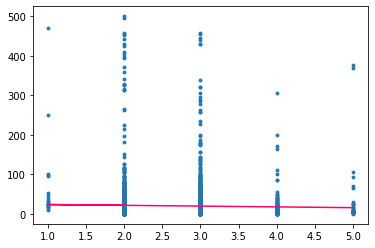

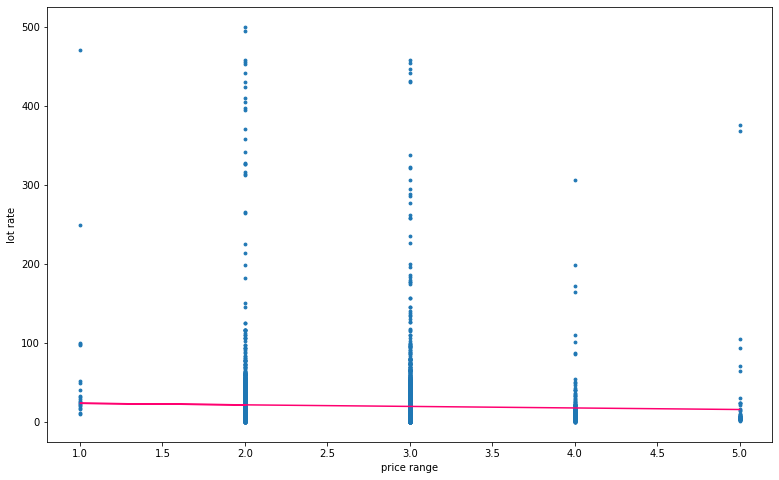

In [1314]:
y_hat=slr.predict(X[:,0],show=1)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0],y,s=8)
plt.plot(X[:,0],y_hat,color="#FF0070")
plt.xlabel('price range')
plt.ylabel('lot rate')


In [1315]:
X=house_df[['price_Per_Sqrt_ft','lot_rate','price_range']].copy()

In [1316]:
X = np.array(X, dtype=np.float64) 

In [1317]:
#X = X.astype(int)

In [1318]:
#X  = X.astype(float)

In [1319]:
#X=X.to_numpy()

In [1320]:
y=X[:,-1]
y

array([5., 2., 3., ..., 2., 3., 2.])

In [1321]:
X=X[:,:-1]
X

array([[475.,  10.],
       [199.,   7.],
       [280.,   5.],
       ...,
       [137.,  60.],
       [237.,  26.],
       [147.,  11.]])

In [1322]:
X,y

(array([[475.,  10.],
        [199.,   7.],
        [280.,   5.],
        ...,
        [137.,  60.],
        [237.,  26.],
        [147.,  11.]]), array([5., 2., 3., ..., 2., 3., 2.]))

In [1323]:
class LinearRegression():
  def fit(self,X,y):
    self.w = np.linalg.solve(X.T@X,X.T@y)

  def predict(self,X):
    return np.matmul(X,self.w)
    

In [1324]:
def OLS(Y,Y_hat,N):
  return (1/(2*N)*np.sum((Y-Y_hat)**2))

In [1325]:
def R2(Y,Y_hat):
  return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [1326]:
class MVLinearRegression():  #MV = multivariate
  def fit(self,X,y,eta = 1e-3, epochs=1e3, show_curve = False):
    epochs=int(epochs)
    N,D = X.shape #N=elements D=features
    Y=y
   # Initialize the weights
    self.w = np.random.randn(D)

    J=np.zeros(epochs)

    for epoch in range(epochs):
      Y_hat=self.predict(X)
      J[epoch]=OLS(Y,Y_hat,N)
      #weight update Rule:
      self.w -=eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      #Plt.show()

  def predict(self,X):
    return X @ self.w

In [1327]:
myReg = MVLinearRegression()

In [1328]:
myReg.fit(X,y)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-1324-2484a7859a29>:2: RuntimeWarning: overflow encountered in square
  return (1/(2*N)*np.sum((Y-Y_hat)**2))
<ipython-input-1326-003a31c09231>:15: RuntimeWarning: overflow encountered in matmul
  self.w -=eta*(1/N)*(X.T@(Y_hat-Y))
<ipython-input-1326-003a31c09231>:15: RuntimeWarning: invalid value encountered in matmul
  self.w -=eta*(1/N)*(X.T@(Y_hat-Y))
<ipython-input-1326-003a31c09231>:15: RuntimeWarning: invalid value encountered in subtract
  self.w -=eta*(1/N)*(X.T@(Y_hat-Y))


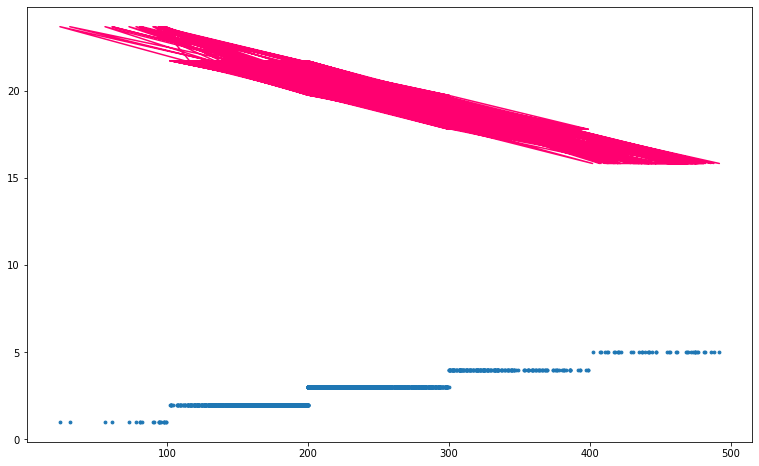

In [1329]:
plt.figure(figsize=(13,8))
plt.scatter(X[:,0],y,s=8)
plt.plot(X[:,0],y_hat,color="#FF0070")
 

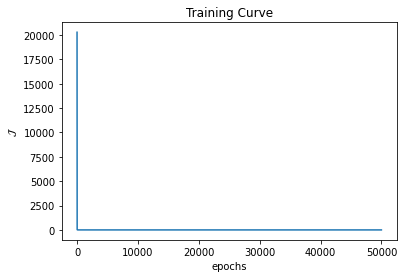

In [1330]:
myReg.fit(X,y,epochs=5e4,eta=1e-5,show_curve=True)
